In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install imbalanced-learn


In [3]:
!pip install --upgrade numpy
!pip install --upgrade gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 70.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 36.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
import nltk
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow import keras
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [2]:
emotion_df = pd.read_csv("/content/drive/My Drive/agr_en_train.csv")
emotion_df.head()

,facebook_corpus_msr_1723796,Well said sonu..you have courage to stand against dadagiri of Muslims,OAG
0,facebook_corpus_msr_466073,"Most of Private Banks ATM's Like HDFC, ICICI e...",NAG
1,facebook_corpus_msr_1493901,"Now question is, Pakistan will adhere to this?",OAG
2,facebook_corpus_msr_405512,Pakistan is comprised of fake muslims who does...,OAG
3,facebook_corpus_msr_1521685,"??we r against cow slaughter,so of course it w...",NAG
4,facebook_corpus_msr_462570,Wondering why Educated Ambassador is strugglin...,CAG


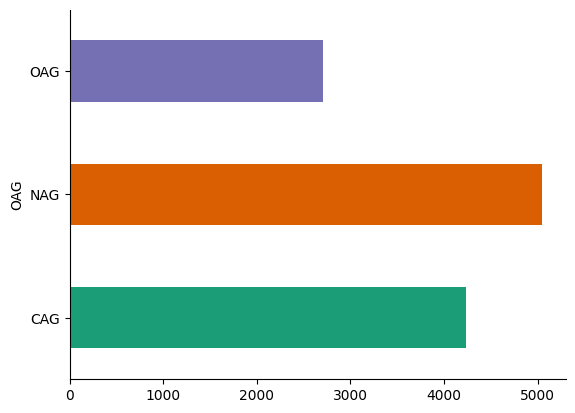

In [ ]:
# @title OAG

from matplotlib import pyplot as plt
import seaborn as sns
emotion_df.groupby('OAG').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

**DATA PREPROCESSING**




In [3]:
emotion_df.columns = ["ids", "text", "labels"]

In [4]:
emotion_df.head()

,ids,text,labels
0,facebook_corpus_msr_466073,"Most of Private Banks ATM's Like HDFC, ICICI e...",NAG
1,facebook_corpus_msr_1493901,"Now question is, Pakistan will adhere to this?",OAG
2,facebook_corpus_msr_405512,Pakistan is comprised of fake muslims who does...,OAG
3,facebook_corpus_msr_1521685,"??we r against cow slaughter,so of course it w...",NAG
4,facebook_corpus_msr_462570,Wondering why Educated Ambassador is strugglin...,CAG


In [5]:
emotion_df.drop(columns = ['ids'], inplace = True)


In [6]:
emotion_df.head()

,text,labels
0,"Most of Private Banks ATM's Like HDFC, ICICI e...",NAG
1,"Now question is, Pakistan will adhere to this?",OAG
2,Pakistan is comprised of fake muslims who does...,OAG
3,"??we r against cow slaughter,so of course it w...",NAG
4,Wondering why Educated Ambassador is strugglin...,CAG


In [7]:
import re
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"@\w+", "", text)
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text
emotion_df['text'] = emotion_df['text'].apply(clean_text)
emotion_df.head()


,text,labels
0,most of private banks atms like hdfc icici etc...,NAG
1,now question is pakistan will adhere to this,OAG
2,pakistan is comprised of fake muslims who does...,OAG
3,we r against cow slaughterso of course it will...,NAG
4,wondering why educated ambassador is strugglin...,CAG


***Stopword Removal ***

In [8]:

!pip install nltk

import nltk

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

print("NLTK dependencies downloaded successfully!")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


NLTK dependencies downloaded successfully!


In [9]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('stopwords')

stop_words = set(nltk.corpus.stopwords.words('english'))
def remove_stopwords(text):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)
emotion_df['text'] = emotion_df['text'].apply(remove_stopwords)
print("Sample Text After Stopword Removal:", emotion_df['text'].iloc[0])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Sample Text After Stopword Removal: private banks atms like hdfc icici etc cash public sector banks atm working


**Label Encoding**

In [10]:
label_mapping = {'OAG': 0, 'CAG': 1, 'NAG': 2}
emotion_df['labels'] = emotion_df['labels'].map(label_mapping)
emotion_df.head()


,text,labels
0,private banks atms like hdfc icici etc cash pu...,2
1,question pakistan adhere,0
2,pakistan comprised fake muslims know meaning u...,0
3,r cow slaughterso course stop leather manufact...,2
4,wondering educated ambassador struggling pay c...,1


#Balancing

In [11]:
from imblearn.under_sampling import RandomUnderSampler


X = emotion_df.drop(columns=['labels'])
y = emotion_df['labels']


rus = RandomUnderSampler(sampling_strategy={0: 2707, 1: 2707, 2: 2707}, random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)


balanced_emotion_df = pd.concat([X_resampled, y_resampled], axis=1)


print("Class Distribution After Balancing:")
print(balanced_emotion_df['labels'].value_counts())

balanced_emotion_df.head()


Class Distribution After Balancing:
labels
0    2707
1    2707
2    2707
Name: count, dtype: int64


,text,labels
4621,bc thought majority,0
1893,dont call himsir booth licker modi idiot,0
7741,wrong corrupted person,0
1281,u r communalise,0
9767,aqeel ahmad sir go google search ranks judicia...,0


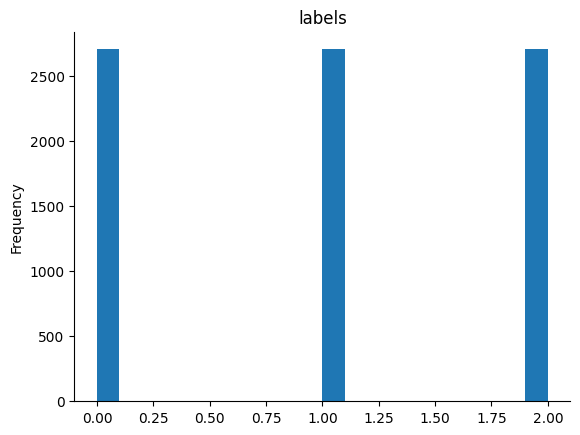

In [ ]:
# @title labels

from matplotlib import pyplot as plt
balanced_emotion_df['labels'].plot(kind='hist', bins=20, title='labels')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [12]:
unique_words = set(" ".join(emotion_df['text']).split())
word_to_index = {word: i+1 for i, word in enumerate(unique_words)}

print("Sample of Unique Words Dictionary:", dict(list(word_to_index.items())[:50]))



Sample of Unique Words Dictionary: {'cutting': 1, 'ssp': 2, 'bhajan': 3, 'accessed': 4, 'voter': 5, 'apj': 6, 'charted': 7, 'taste': 8, 'mamamaternal': 9, 'karne': 10, 'gang': 11, 'doorstep': 12, 'flu': 13, 'sardar': 14, 'sameway': 15, 'nexon': 16, 'hiw': 17, 'sonali': 18, 'nehruthe': 19, 'onwe': 20, 'rumours': 21, 'squandering': 22, 'armaan': 23, 'indra': 24, 'yehi': 25, 'miles': 26, 'junior': 27, 'jobwhat': 28, 'forgets': 29, 'unreasonable': 30, 'aboutmuslimare': 31, 'silencer': 32, 'betrayed': 33, 'yesvery': 34, 'swollen': 35, 'hamas': 36, 'fellow': 37, 'surnamesstart': 38, 'gandhisanjay': 39, 'consortium': 40, 'buiness': 41, 'nikamee': 42, 'bey': 43, 'bsfcprf': 44, 'diminishingmarginalized': 45, 'antidrug': 46, 'micra': 47, 'mamtaji': 48, 'nominate': 49, 'dd': 50}


In [13]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-wiki/wiki.en.vec


--2025-04-14 22:52:04--  https://dl.fbaipublicfiles.com/fasttext/vectors-wiki/wiki.en.vec
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.35.238.113, 13.35.238.71, 13.35.238.84, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|13.35.238.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6597238061 (6.1G) [binary/octet-stream]
Saving to: ‘wiki.en.vec’

wiki.en.vec         100%[===================>]   6.14G   242MB/s    in 32s     

2025-04-14 22:52:37 (195 MB/s) - ‘wiki.en.vec’ saved [6597238061/6597238061]



In [14]:
from gensim.models import KeyedVectors

fasttext_model = KeyedVectors.load_word2vec_format('wiki.en.vec')

In [15]:
def get_embedding(word):
    return fasttext_model[word] if word in fasttext_model else np.random.uniform(-0.01, 0.01, 300)

def compute_sentence_embedding(text):
    words = text.split()
    word_vectors = [get_embedding(w) for w in words]
    return np.mean(word_vectors, axis=0) if word_vectors else np.random.uniform(-0.01, 0.01, 300)

df = balanced_emotion_df.copy()
df['fasttext_embeddings'] = balanced_emotion_df['text'].apply(compute_sentence_embedding)
X_fasttext = np.stack(df['fasttext_embeddings'].values)

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=100)
tfidf_features = tfidf.fit_transform(balanced_emotion_df['text']).toarray()


In [17]:
df['text_len'] = balanced_emotion_df['text'].apply(len)
df['num_tokens'] = balanced_emotion_df['text'].apply(lambda x: len(x.split()))

numeric_features = df[['text_len', 'num_tokens']].values


In [18]:
def lexical_features(text):
    tokens = text.split()
    num_tokens = len(tokens)
    num_unique_tokens = len(set(tokens))
    avg_word_len = np.mean([len(word) for word in tokens]) if tokens else 0
    vocab_richness = num_unique_tokens / num_tokens if num_tokens > 0 else 0

    return [avg_word_len, vocab_richness]

lexical_feats = np.array([lexical_features(t) for t in balanced_emotion_df['text']])


In [19]:
import nltk
from sklearn.preprocessing import StandardScaler



nltk.download('punkt')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('vader_lexicon')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [20]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.preprocessing import StandardScaler
import pandas as pd
import re


# Initialize sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Define basic insult word list (expand as needed)
insult_words = {'stupid', 'idiot', 'dumb', 'moron', 'fool', 'loser', 'terrorist', 'filthy', 'pig',
 'dog', 'bastard', 'scum', 'vermin', 'psycho', 'rapist', 'bitch', 'shit', 'garbage',
 'illiterate', 'ignorant', 'uncivilized', 'barbarian', 'hate', 'kill'}

# Feature extraction function
def get_features(text):
    tokens = nltk.word_tokenize(text)
    pos_tags = nltk.pos_tag(tokens)

    # POS frequency counts
    pos_counts = {}
    for _, tag in pos_tags:
        pos_counts[tag] = pos_counts.get(tag, 0) + 1

    # Insult word count
    insult_count = sum(1 for word in tokens if word.lower() in insult_words)
    pos_counts['insult_count'] = insult_count

    # Negative sentiment score
    sentiment_scores = sid.polarity_scores(text)
    pos_counts['neg_sentiment'] = sentiment_scores['neg']

    return pos_counts


pos_features = df['text'].apply(get_features).apply(pd.Series).fillna(0)

# Store column names for consistency
pos_feature_columns = pos_features.columns.tolist()

# Normalize POS features (except for insult/sentiment)
pos_cols = [col for col in pos_feature_columns if col not in ['insult_count', 'neg_sentiment']]
pos_features[pos_cols] = pos_features[pos_cols].div(pos_features[pos_cols].sum(axis=1), axis=0).fillna(0)

# Scale
scaler_pos = StandardScaler()
pos_scaled = scaler_pos.fit_transform(pos_features)


# Display sample
print("\n Feature Matrix Sample:")
print(pos_features.head(10))



 Feature Matrix Sample:
            NN       VBD  insult_count  neg_sentiment        RB       VBN  \
4621  0.666667  0.333333           0.0          0.000  0.000000  0.000000   
1893  1.000000  0.000000           1.0          0.355  0.000000  0.000000   
7741  0.333333  0.000000           0.0          0.608  0.333333  0.333333   
1281  0.666667  0.000000           0.0          0.000  0.000000  0.000000   
9767  0.373626  0.065934           0.0          0.177  0.054945  0.043956   
2066  0.676471  0.000000           1.0          0.107  0.000000  0.000000   
4812  0.250000  0.000000           0.0          0.500  0.000000  0.000000   
9231  1.000000  0.000000           0.0          0.000  0.000000  0.000000   
9750  0.333333  0.000000           0.0          0.143  0.000000  0.000000   
1396  0.714286  0.000000           0.0          0.000  0.000000  0.000000   

            JJ       VBP       NNS       VBZ  ...   CC  RBS  POS  PRP$   TO  \
4621  0.000000  0.000000  0.000000  0.000000  ..

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD

scaler = StandardScaler()
X_fasttext_scaled = scaler.fit_transform(X_fasttext)
numeric_scaled = scaler.fit_transform(numeric_features)
lexical_scaled = scaler.fit_transform(lexical_feats)



final_features = np.concatenate([
    X_fasttext_scaled,
    tfidf_features,
    numeric_scaled,
    lexical_scaled,
    pos_scaled
], axis=1)
final_features.shape

(8121, 441)

Accuracy: 0.5396923076923077

Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.57      0.56       541
           1       0.47      0.42      0.44       542
           2       0.59      0.63      0.61       542

    accuracy                           0.54      1625
   macro avg       0.54      0.54      0.54      1625
weighted avg       0.54      0.54      0.54      1625



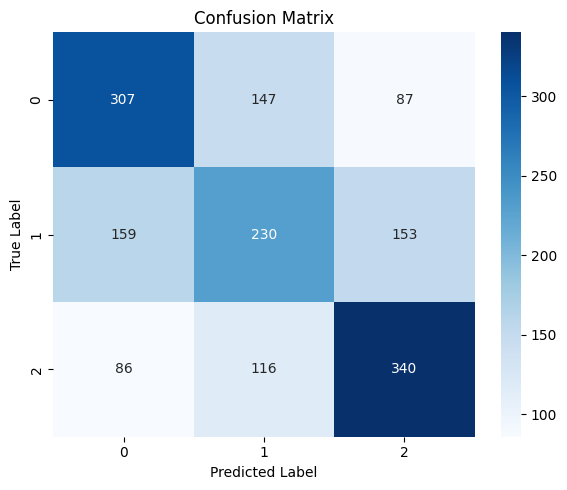

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

X = final_features
y = balanced_emotion_df['labels']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train the model
clf = RandomForestClassifier(
    n_estimators=100,     # number of trees
    max_depth=None,
    random_state=42
)

clf.fit(X_train, y_train)

# Evaluate
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

#FFN

Epoch 1/40
102/102 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - accuracy: 0.3614 - loss: 1.3370 - val_accuracy: 0.4923 - val_loss: 1.0331 - learning_rate: 5.0000e-04
Epoch 2/40
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4496 - loss: 1.1467 - val_accuracy: 0.5342 - val_loss: 1.0005 - learning_rate: 5.0000e-04
Epoch 3/40
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4720 - loss: 1.0827 - val_accuracy: 0.5372 - val_loss: 0.9836 - learning_rate: 5.0000e-04
Epoch 4/40
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4950 - loss: 1.0539 - val_accuracy: 0.5514 - val_loss: 0.9723 - learning_rate: 5.0000e-04
Epoch 5/40
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5029 - loss: 1.0266 - val_accuracy: 0.5495 - val_loss: 0.9691 - learning_rate: 5.0000e-04
Epoch 6/40
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5210 - loss: 1.0025 - val_accuracy: 0.5582 - val_loss: 0.9656 - learning_rate: 5.0000e-04
Epoch 7/40
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy

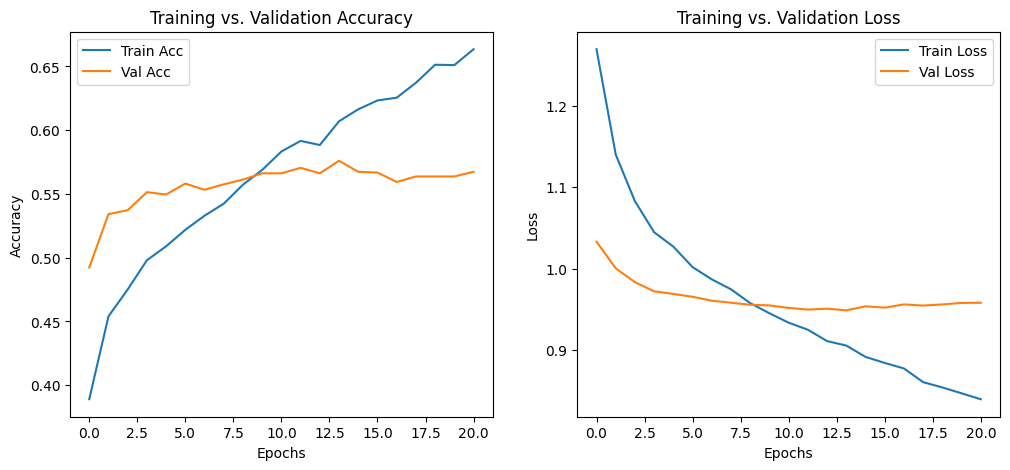

51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


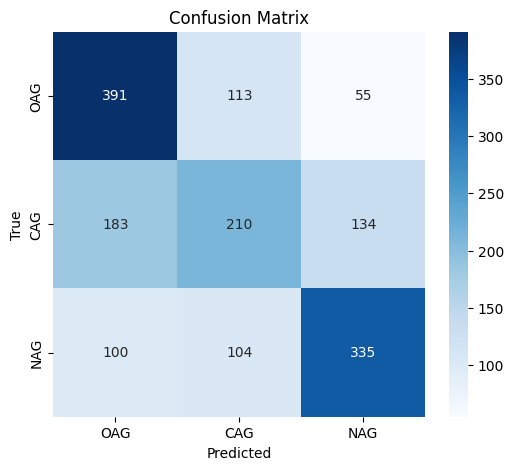

Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.70      0.63       559
           1       0.49      0.40      0.44       527
           2       0.64      0.62      0.63       539

    accuracy                           0.58      1625
   macro avg       0.57      0.57      0.57      1625
weighted avg       0.57      0.58      0.57      1625



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils.class_weight import compute_class_weight


X = final_features
y = balanced_emotion_df['labels'].values
y_categorical = tf.keras.utils.to_categorical(y, num_classes=3)

X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)


input_layer = Input(shape=(441,))
x = Dense(256)(input_layer)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.4)(x)

x = Dense(128)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.4)(x)

x = Dense(64)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.3)(x)

output_layer = Dense(3, activation='softmax')(x)


model = Model(inputs=input_layer, outputs=output_layer)
model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
    optimizer=Adam(learning_rate=0.0005),
    metrics=['accuracy']
)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)




class_weights = compute_class_weight('balanced', classes=np.unique(np.argmax(y_train, axis=1)), y=np.argmax(y_train, axis=1))
class_weights_dict = dict(enumerate(class_weights))


history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=40, batch_size=64, callbacks=[early_stop, reduce_lr],class_weight=class_weights_dict)


# Plot Training Curves

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training vs. Validation Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs. Validation Loss")

plt.show()


# Evaluate
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['OAG', 'CAG', 'NAG'], yticklabels=['OAG', 'CAG', 'NAG'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n", classification_report(y_true, y_pred))



In [ ]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.7 MB/s eta 0:00:00


Trial 20 Complete [00h 00m 29s]
val_accuracy: 0.5433846116065979

Best val_accuracy So Far: 0.5593846440315247
Total elapsed time: 00h 10m 39s
Epoch 1/40
102/102 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - accuracy: 0.6074 - loss: 0.9023 - val_accuracy: 0.5545 - val_loss: 0.9695 - learning_rate: 3.0000e-04
Epoch 2/40
102/102 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6099 - loss: 0.8942 - val_accuracy: 0.5452 - val_loss: 0.9700 - learning_rate: 3.0000e-04
Epoch 3/40
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6211 - loss: 0.8841 - val_accuracy: 0.5514 - val_loss: 0.9700 - learning_rate: 3.0000e-04
Epoch 4/40
 92/102 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6271 - loss: 0.8797
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0001500000071246177.
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6270 - loss: 0.8802 - val_accuracy: 0.5502 - val_loss: 0.9721 - learning_rate: 3.0000e-04
Epoch 5/40
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6343 - loss: 0

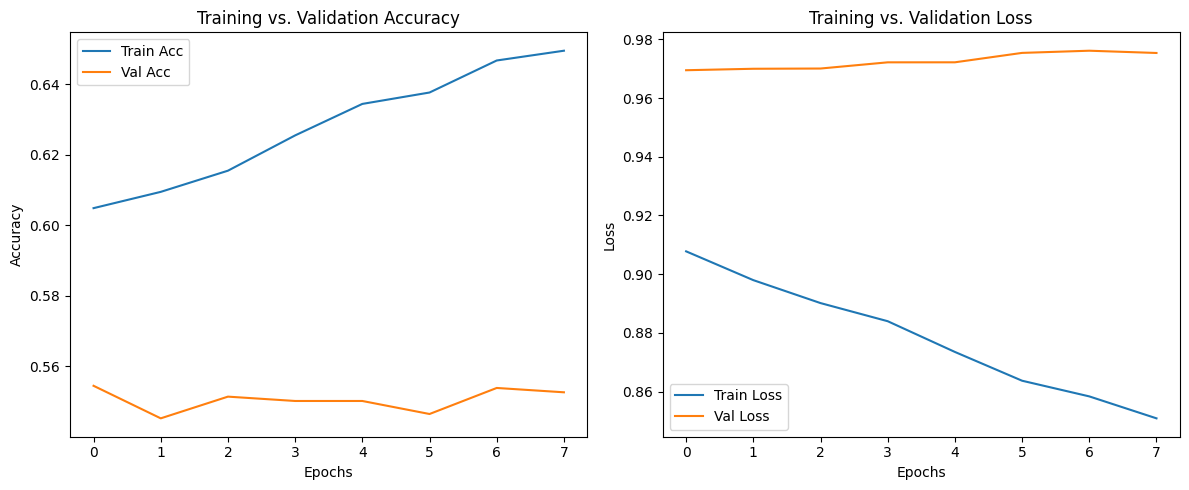

51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


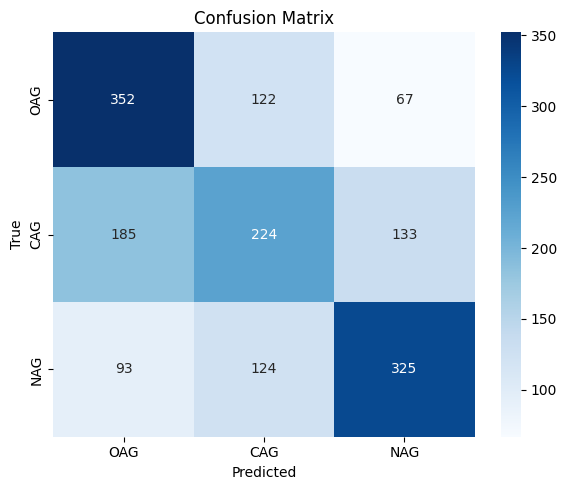

Classification Report:
               precision    recall  f1-score   support

         OAG       0.56      0.65      0.60       541
         CAG       0.48      0.41      0.44       542
         NAG       0.62      0.60      0.61       542

    accuracy                           0.55      1625
   macro avg       0.55      0.55      0.55      1625
weighted avg       0.55      0.55      0.55      1625



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils.class_weight import compute_class_weight
import keras_tuner as kt

# ----------------------------
# DATA PREPARATION
# ----------------------------
X = final_features
y = balanced_emotion_df['labels'].values
y_categorical = tf.keras.utils.to_categorical(y, num_classes=3)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_categorical, test_size=0.2, stratify=y, random_state=42
)

# Compute class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(np.argmax(y_train, axis=1)),
    y=np.argmax(y_train, axis=1)
)
class_weights_dict = dict(enumerate(class_weights))

# ----------------------------
# MODEL BUILDING FUNCTION FOR TUNER
# ----------------------------
def build_model(hp):
    input_layer = Input(shape=(X.shape[1],))
    x = input_layer

    for i in range(hp.Int("num_layers", 2, 4)):
        x = Dense(units=hp.Int(f"units_{i}", 64, 512, step=64))(x)
        x = BatchNormalization()(x)
        x = LeakyReLU()(x)
        x = Dropout(hp.Float(f"dropout_{i}", 0.3, 0.6, step=0.1))(x)

    output_layer = Dense(3, activation='softmax')(x)

    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(
        loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
        optimizer=Adam(learning_rate=hp.Choice("lr", [1e-4, 3e-4, 5e-4, 1e-3])),
        metrics=['accuracy']
    )
    return model

# ----------------------------
# KERAS TUNER SEARCH
# ----------------------------
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=20,
    executions_per_trial=1,
    directory='tuner_dir',
    project_name='emotion_dnn_tuning'
)

early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

tuner.search(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=30,
    batch_size=64,
    class_weight=class_weights_dict,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

# ----------------------------
# TRAIN BEST MODEL
# ----------------------------
best_model = tuner.get_best_models(num_models=1)[0]

history = best_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=40,
    batch_size=64,
    class_weight=class_weights_dict,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

# ----------------------------
# PLOT TRAINING CURVES
# ----------------------------
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs. Validation Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs. Validation Loss")
plt.legend()

plt.tight_layout()
plt.show()

# ----------------------------
# FINAL EVALUATION
# ----------------------------
y_pred = np.argmax(best_model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['OAG', 'CAG', 'NAG'],
            yticklabels=['OAG', 'CAG', 'NAG'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

print("Classification Report:\n", classification_report(y_true, y_pred, target_names=['OAG', 'CAG', 'NAG']))


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
import numpy as np

# Fit separate scalers for each feature group
scaler_fasttext = StandardScaler()
X_fasttext_scaled = scaler_fasttext.fit_transform(X_fasttext)

scaler_numeric = StandardScaler()
numeric_scaled = scaler_numeric.fit_transform(numeric_features)

scaler_lexical = StandardScaler()
lexical_scaled = scaler_lexical.fit_transform(lexical_feats)

scaler_pos = StandardScaler()
pos_scaled = scaler_pos.fit_transform(pos_features)

# Dimensionality reduction for TF-IDF
svd = TruncatedSVD(n_components=100, random_state=42)
tfidf_reduced = svd.fit_transform(tfidf_features)

# Final feature concatenation
final_features = np.concatenate([
    X_fasttext_scaled,
    tfidf_reduced,
    numeric_scaled,
    lexical_scaled,
    pos_scaled
], axis=1)


In [ ]:
def predict_texts(texts, model):
    cleaned_texts = [remove_stopwords(clean_text(t)) for t in texts]

    fasttext_vecs = np.array([compute_sentence_embedding(t) for t in cleaned_texts])
    fasttext_scaled = scaler_fasttext.transform(fasttext_vecs)

    tfidf_vecs = tfidf.transform(cleaned_texts)
    tfidf_reduced_new = svd.transform(tfidf_vecs)

    text_lens = np.array([len(t) for t in texts])
    num_tokens = np.array([len(t.split()) for t in texts])
    numeric_feats = np.stack([text_lens, num_tokens], axis=1)
    numeric_scaled_new = scaler_numeric.transform(numeric_feats)

    lexical_feats = np.array([lexical_features(t) for t in texts])
    lexical_scaled_new = scaler_lexical.transform(lexical_feats)

    # POS + insult + sentiment
    pos_feats_df = pd.DataFrame([get_features(t) for t in texts]).fillna(0)

    # Ensure columns match training
    for col in pos_feature_columns:
        if col not in pos_feats_df:
            pos_feats_df[col] = 0  # Add missing cols with 0

    pos_feats_df = pos_feats_df[pos_feature_columns]  # Reorder to match

    # Normalize POS columns (same as during training)
    pos_cols = [col for col in pos_feature_columns if col not in ['insult_count', 'neg_sentiment']]
    pos_feats_df[pos_cols] = pos_feats_df[pos_cols].div(pos_feats_df[pos_cols].sum(axis=1), axis=0).fillna(0)

    pos_scaled_new = scaler_pos.transform(pos_feats_df)

    final_input = np.concatenate([
        fasttext_scaled,
        tfidf_reduced_new,
        numeric_scaled_new,
        lexical_scaled_new,
        pos_scaled_new
    ], axis=1)

    preds = np.argmax(model.predict(final_input), axis=1)
    label_map = {0: 'OAG', 1: 'CAG', 2: 'NAG'}

    for t, p in zip(texts, preds):
        print(f"Text: {t}\nPredicted Label: {label_map[p]}\n")



test_sentences = [
    "You are so stupid, I can't believe how dumb you are!",  # Expected: OAG
    "I think this might not be a great idea, but you decide.",  # Expected: CAG
    "Hope you have a great day ahead!"  # Expected: NAG
]

predict_texts(test_sentences, best_model)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
Text: You are so stupid, I can't believe how dumb you are!
Predicted Label: OAG

Text: I think this might not be a great idea, but you decide.
Predicted Label: CAG

Text: Hope you have a great day ahead!
Predicted Label: NAG

